# Homework 1

**GRUPO:**

- Gabriel Vasconcelos Fruet - 537618
- Kelvin Leandro Martins - 540006
- Mateus Pereira Santos - 541048
- Pedro Leinos Falcão Cunha - 542114

## Dados

In [ ]:
!gdown 1cNHz15K40hr1qOw7yQBdSAEkpXVFq44x # winequality-red.csv
!gdown 1SadTe941EKAIniYoNvBJELU6sowJ9176 # winequality-white.csv

Downloading...
From: https://drive.google.com/uc?id=1cNHz15K40hr1qOw7yQBdSAEkpXVFq44x
To: /content/winequality-red.csv
100% 84.2k/84.2k [00:00<00:00, 68.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1SadTe941EKAIniYoNvBJELU6sowJ9176
To: /content/winequality-white.csv
100% 264k/264k [00:00<00:00, 76.2MB/s]


## Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Leitura dos dados

In [ ]:
red = pd.read_csv('winequality-red.csv', sep=';')
white = pd.read_csv('winequality-white.csv', sep=';')

white['wine type'] = 'white'
red['wine type'] = 'red'
df = pd.concat([red, white], ignore_index=True)
print(df)

In [ ]:
normalized_df=df.copy()
description = df.describe()
for feature in normalized_df.columns:
  if feature == 'wine type' or feature == 'quality':
    continue
  mean = description[feature]["mean"]
  std = description[feature]["std"]
  normalized_df[feature] = (df[feature]-mean)/std

In [ ]:
df.describe().round(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000
mean,7.215,0.340,0.319,5.443,0.056,30.525,115.745,0.995,3.219,0.531,10.492,5.818
std,1.296,0.165,0.145,4.758,0.035,17.749,56.522,0.003,0.161,0.149,1.193,0.873
min,3.800,0.080,0.000,0.600,0.009,1.000,6.000,0.987,2.720,0.220,8.000,3.000
25%,6.400,0.230,0.250,1.800,0.038,17.000,77.000,0.992,3.110,0.430,9.500,5.000
50%,7.000,0.290,0.310,3.000,0.047,29.000,118.000,0.995,3.210,0.510,10.300,6.000
75%,7.700,0.400,0.390,8.100,0.065,41.000,156.000,0.997,3.320,0.600,11.300,6.000
max,15.900,1.580,1.660,65.800,0.611,289.000,440.000,1.039,4.010,2.000,14.900,9.000


In [ ]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [ ]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


## Análise Descritiva/Exploratória

### Univariada

In [ ]:
df.shape

(6497, 13)

In [ ]:
df.describe().round(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000
mean,7.215,0.340,0.319,5.443,0.056,30.525,115.745,0.995,3.219,0.531,10.492,5.818
std,1.296,0.165,0.145,4.758,0.035,17.749,56.522,0.003,0.161,0.149,1.193,0.873
min,3.800,0.080,0.000,0.600,0.009,1.000,6.000,0.987,2.720,0.220,8.000,3.000
25%,6.400,0.230,0.250,1.800,0.038,17.000,77.000,0.992,3.110,0.430,9.500,5.000
50%,7.000,0.290,0.310,3.000,0.047,29.000,118.000,0.995,3.210,0.510,10.300,6.000
75%,7.700,0.400,0.390,8.100,0.065,41.000,156.000,0.997,3.320,0.600,11.300,6.000
max,15.900,1.580,1.660,65.800,0.611,289.000,440.000,1.039,4.010,2.000,14.900,9.000


In [ ]:
df.drop('wine type', axis=1).skew().round(3)

,0
fixed acidity,1.723
volatile acidity,1.495
citric acid,0.472
residual sugar,1.435
chlorides,5.400
free sulfur dioxide,1.220
total sulfur dioxide,-0.001
density,0.504
pH,0.387
sulphates,1.797


In [ ]:
red.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.320,1.741,4.600,7.100,7.900,9.200,15.900
volatile acidity,1599.0,0.528,0.179,0.120,0.390,0.520,0.640,1.580
citric acid,1599.0,0.271,0.195,0.000,0.090,0.260,0.420,1.000
residual sugar,1599.0,2.539,1.410,0.900,1.900,2.200,2.600,15.500
chlorides,1599.0,0.087,0.047,0.012,0.070,0.079,0.090,0.611
free sulfur dioxide,1599.0,15.875,10.460,1.000,7.000,14.000,21.000,72.000
total sulfur dioxide,1599.0,46.468,32.895,6.000,22.000,38.000,62.000,289.000
density,1599.0,0.997,0.002,0.990,0.996,0.997,0.998,1.004
pH,1599.0,3.311,0.154,2.740,3.210,3.310,3.400,4.010
sulphates,1599.0,0.658,0.170,0.330,0.550,0.620,0.730,2.000


In [ ]:
red.drop('wine type', axis=1).skew().round(3)

,0
fixed acidity,0.983
volatile acidity,0.672
citric acid,0.318
residual sugar,4.541
chlorides,5.680
free sulfur dioxide,1.251
total sulfur dioxide,1.516
density,0.071
pH,0.194
sulphates,2.429


In [ ]:
print(white.describe().T[['mean', 'std']].round(3).to_latex(index=False))

\begin{tabular}{rr}
\toprule
mean & std \\
\midrule
6.855000 & 0.844000 \\
0.278000 & 0.101000 \\
0.334000 & 0.121000 \\
6.391000 & 5.072000 \\
0.046000 & 0.022000 \\
35.308000 & 17.007000 \\
138.361000 & 42.498000 \\
0.994000 & 0.003000 \\
3.188000 & 0.151000 \\
0.490000 & 0.114000 \\
10.514000 & 1.231000 \\
5.878000 & 0.886000 \\
\bottomrule
\end{tabular}



In [ ]:
white.drop('wine type', axis=1).skew().round(3)

,0
fixed acidity,0.648
volatile acidity,1.577
citric acid,1.282
residual sugar,1.077
chlorides,5.023
free sulfur dioxide,1.407
total sulfur dioxide,0.391
density,0.978
pH,0.458
sulphates,0.977


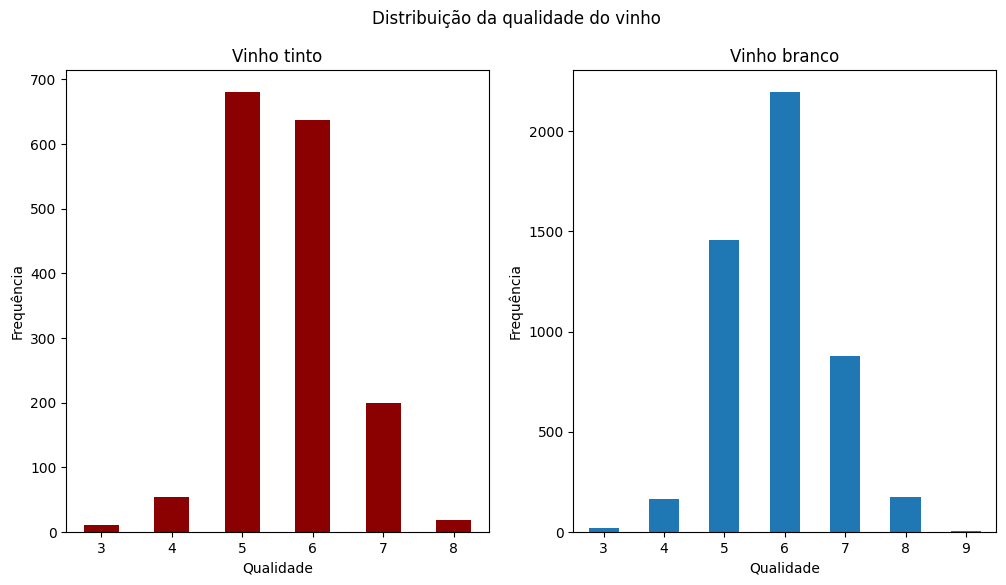

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

plt.suptitle('Distribuição da qualidade do vinho')

red['quality'].value_counts().sort_index().plot(kind='bar', color='darkred', ax=axes[0])
axes[0].set_ylabel('Frequência')
axes[0].set_xlabel('Qualidade')
axes[0].set_title('Vinho tinto')
axes[0].tick_params(rotation=0)

white['quality'].value_counts().sort_index().plot(kind='bar')
axes[1].set_title('Vinho branco')
axes[1].set_xlabel('Qualidade')
axes[1].set_ylabel('Frequência')
axes[1].tick_params(rotation=0)

plt.show()

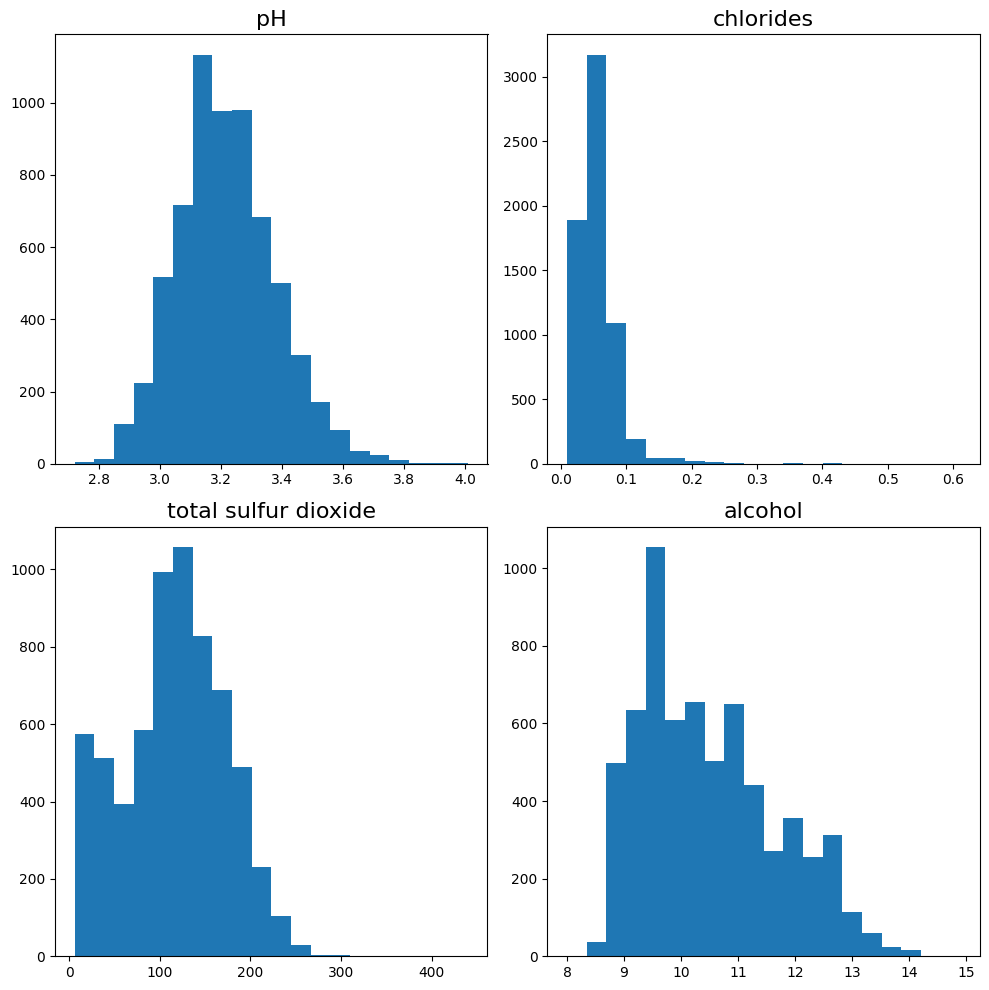

In [ ]:
columns = ['pH', 'chlorides', 'total sulfur dioxide', 'alcohol']
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

for i, column in enumerate(columns):
    axes[i].hist(df[column], bins=20)
    axes[i].set_title(column, fontsize=16)

plt.tight_layout()
plt.show()
fig.savefig("hist_unconditional.png", dpi=300, transparent=True)

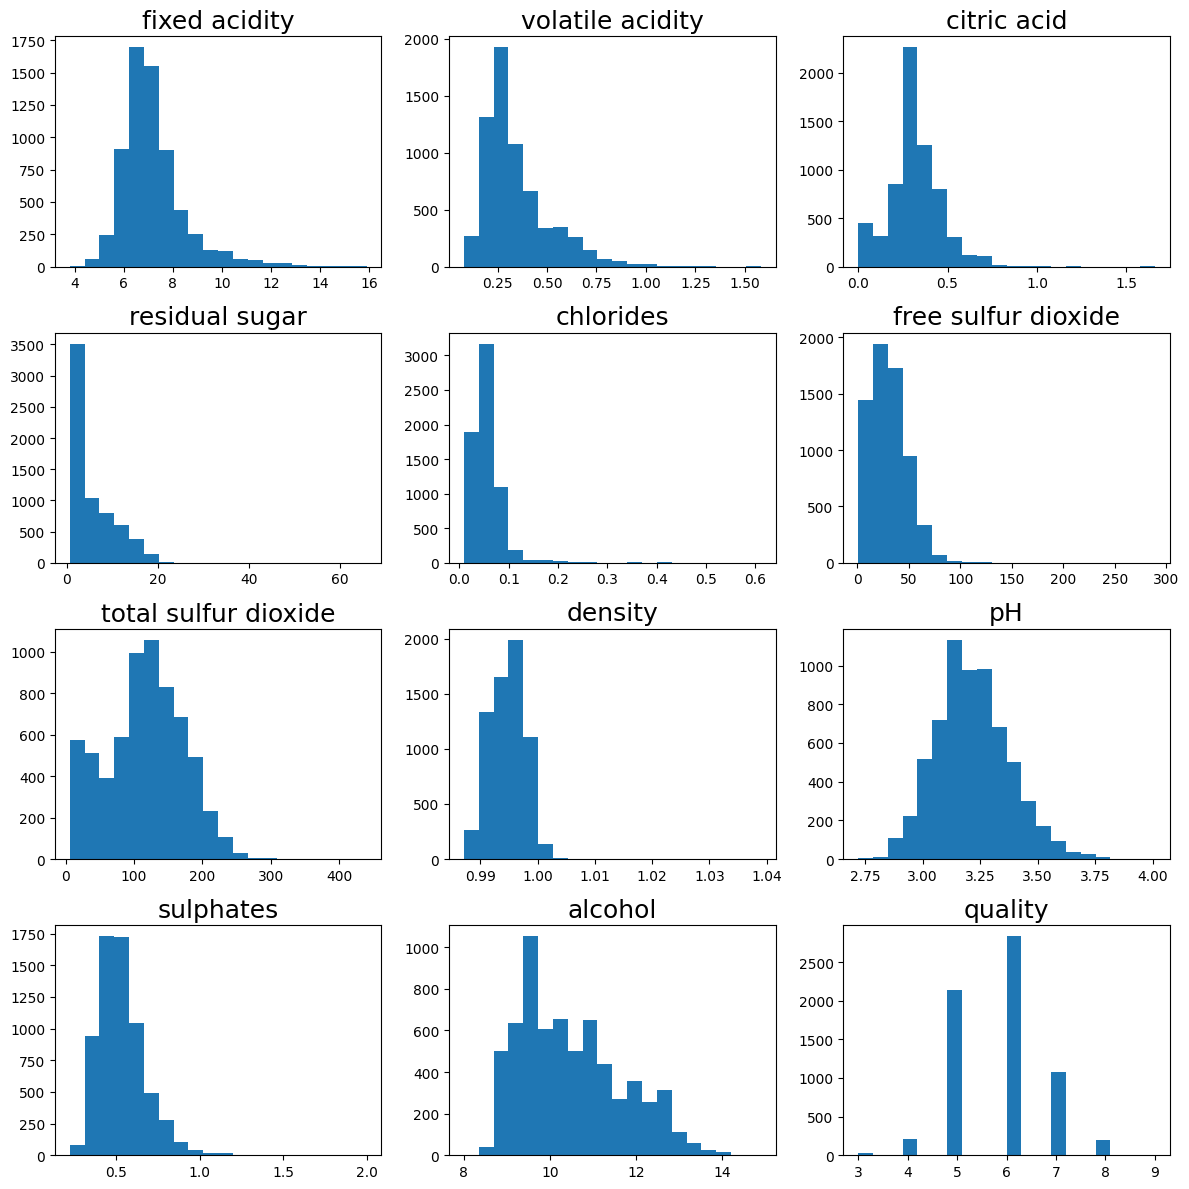

In [ ]:
columns = df.columns[:-1]

fig, axes = plt.subplots(4, 3, figsize=(12, 12))
axes = axes.flatten()

for i, column in enumerate(columns):
    axes[i].hist(df[column], bins=20)
    axes[i].set_title(column, fontsize=18)

plt.tight_layout()
plt.show()
fig.savefig("hist_uncond_complete.png", dpi=300, transparent=True)

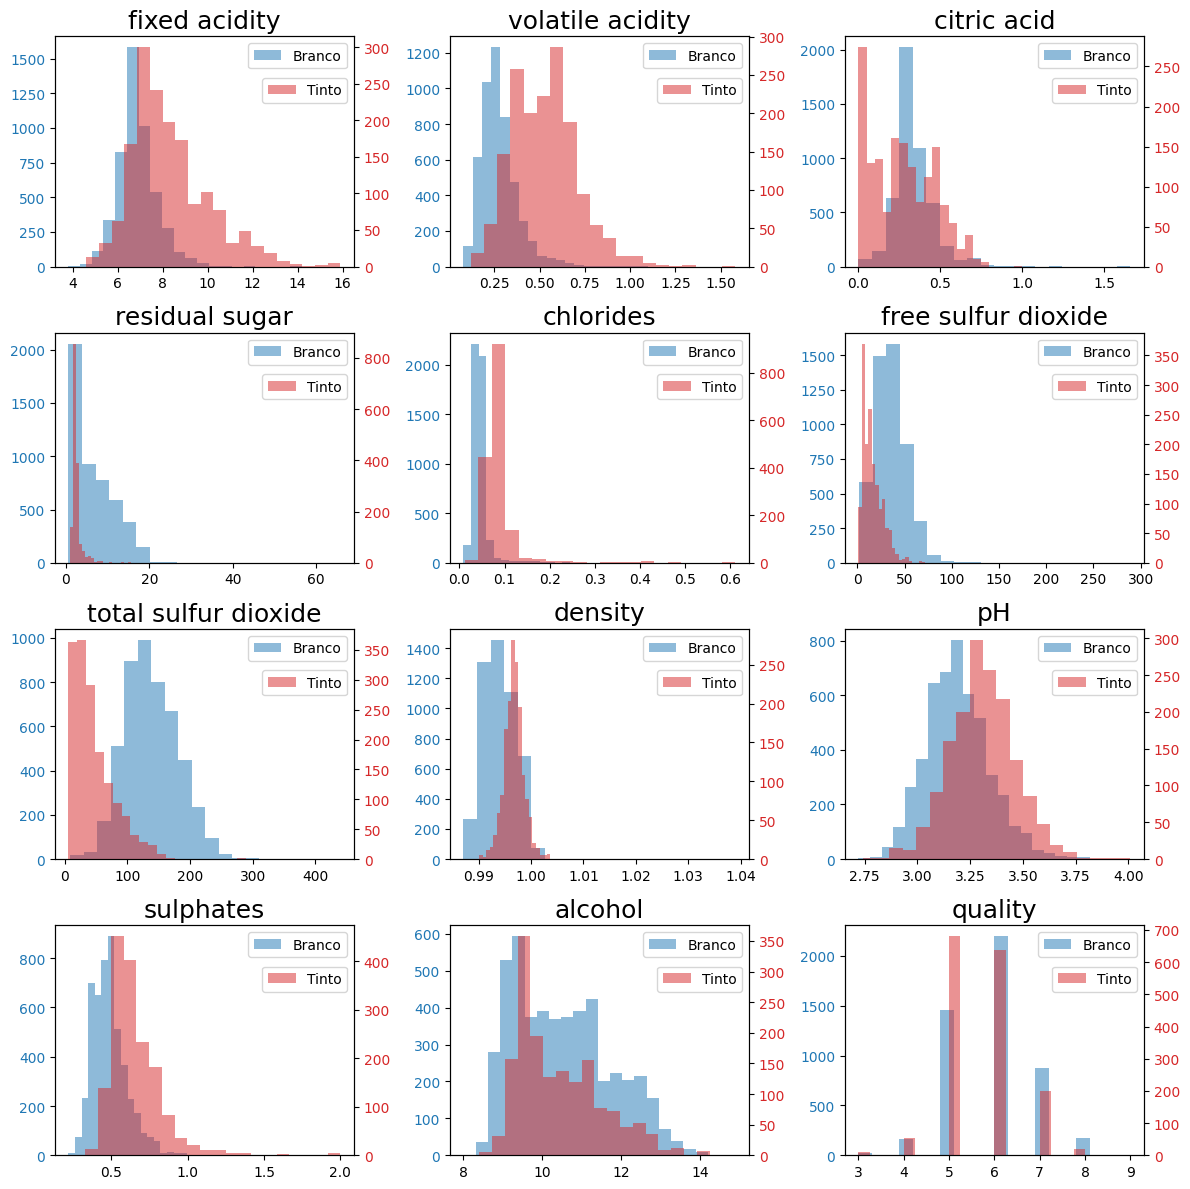

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(12, 12))
# fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()

columns = white.columns[:-1]

for i, column in enumerate(columns):
    color = 'tab:blue'
    axes[i].hist(white[column], bins=20, alpha=0.5, label='Branco', color=color)
    axes[i].set_title(column, fontsize=18)
    axes[i].tick_params(axis='y', labelcolor=color)

    color = 'tab:red'
    ax2 = axes[i].twinx()
    ax2.hist(red[column], bins=20, alpha=0.5, label='Tinto', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    axes[i].legend()
    ax2.legend(bbox_to_anchor=(0, 0, 1, 0.85))

plt.tight_layout()
plt.show()
fig.savefig("hist_conditional.png", dpi=300, transparent=True)

### Bivariada

In [ ]:

HIGH_CORRELATION=['free sulfur dioxide',
                   'total sulfur dioxide',
                   'density', 'residual sugar',
                   'fixed acidity', 'pH',
                   'alcohol', 'wine type']


#HIGH_CORRELATION = ['free sulfur dioxide', 'total sulfur dioxide', 'wine type']

hc_df = df[HIGH_CORRELATION]

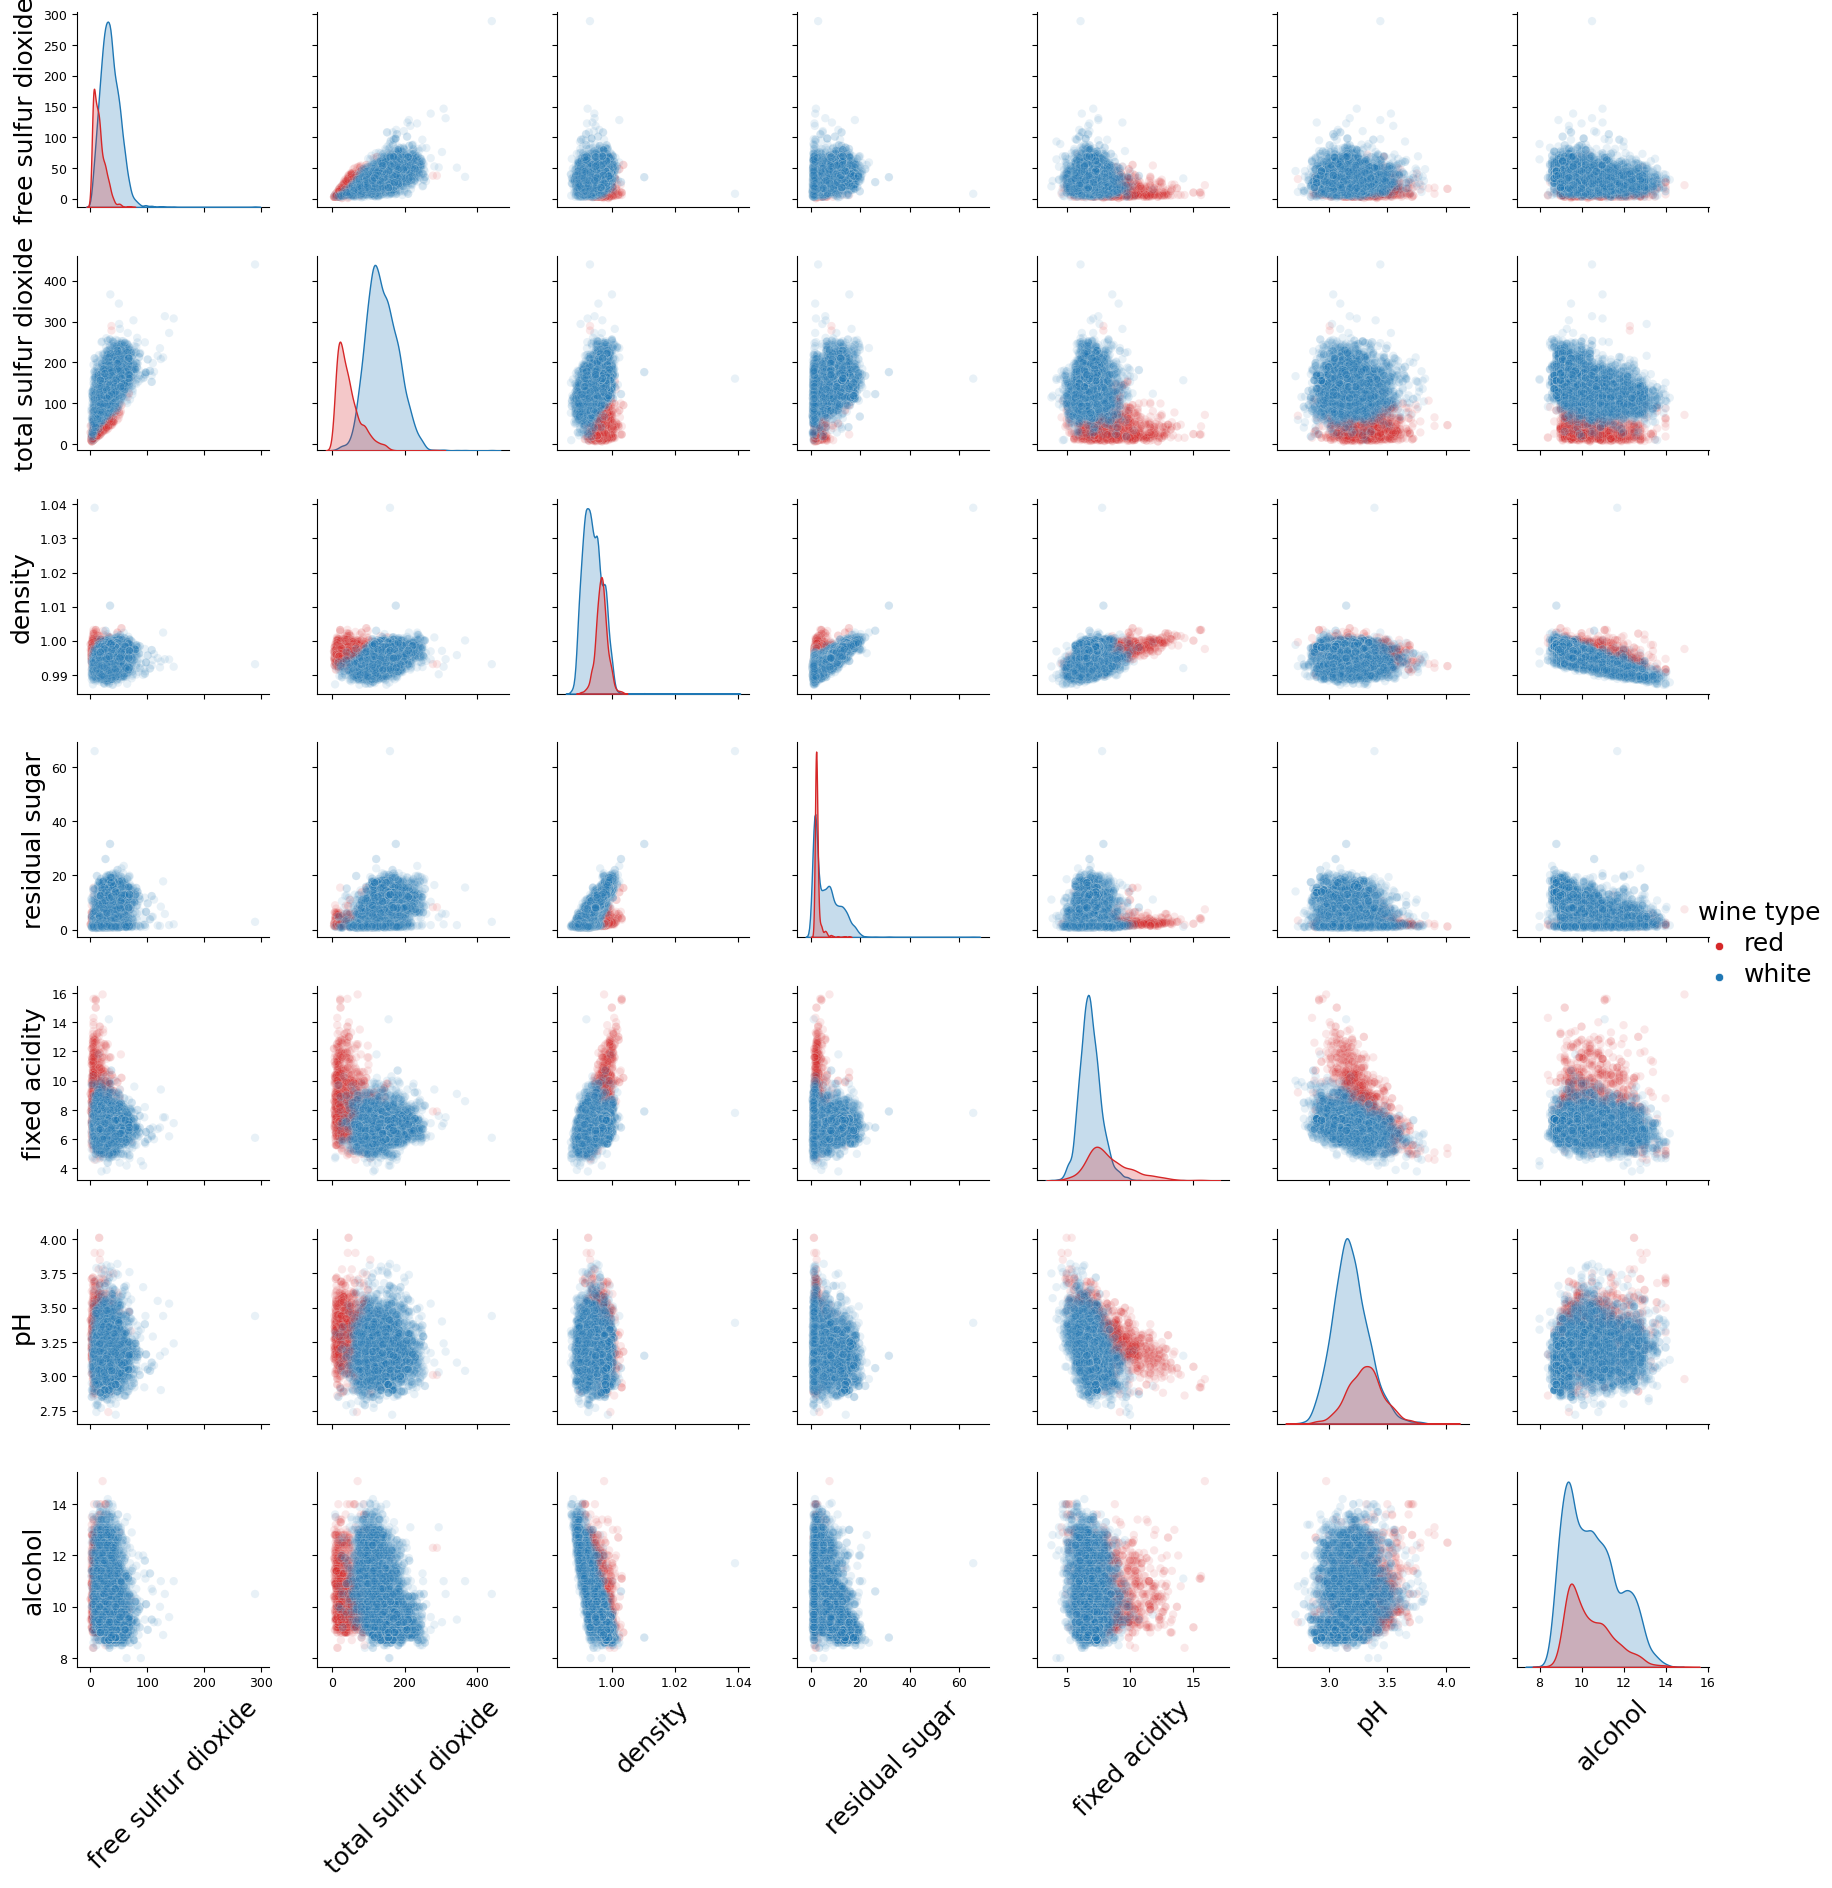

In [ ]:
#sns.pairplot(df, hue='wine type', palette={'red': 'darkred', 'white': 'blue'}, plot_kws={'scatter_kws': {'alpha': 0.1}})

#comentei pq demora mt pra rodar


FONT_SIZE = 18
LABEL_SIZE = 9
#fig = plt.figure(figsize=(11,10))
plt.rcParams['figure.figsize']=(11,10)
pp = sns.pairplot(hc_df, hue='wine type', palette={'red': 'tab:red', 'white': 'tab:blue'}, plot_kws={'alpha': 0.1})


for axes in pp.axes:
  for ax in axes:
    ax.tick_params("y", labelsize=LABEL_SIZE)
    ax.tick_params("x", labelsize=LABEL_SIZE)
    ax.set_xlabel(ax.get_xlabel(), fontsize=FONT_SIZE, rotation=45)
    ax.set_ylabel(ax.get_ylabel(), fontsize=FONT_SIZE)

for lh in pp.fig.legends[0].legend_handles:
  lh.set_alpha(1)


legend = pp.fig.legends[0]
legend.set_title(legend.get_title().get_text(), prop={'size': FONT_SIZE})  # Set legend title font size
for text in legend.texts:
    text.set_fontsize(FONT_SIZE)

plt.subplots_adjust(hspace=0.25, wspace=0.25)
pp.fig.savefig('pairplot.png', transparent=True, dpi=300)


## Correlação

In [ ]:
white_corr = white.drop('wine type', axis=1).corr()
red_corr = red.drop('wine type', axis=1).corr()

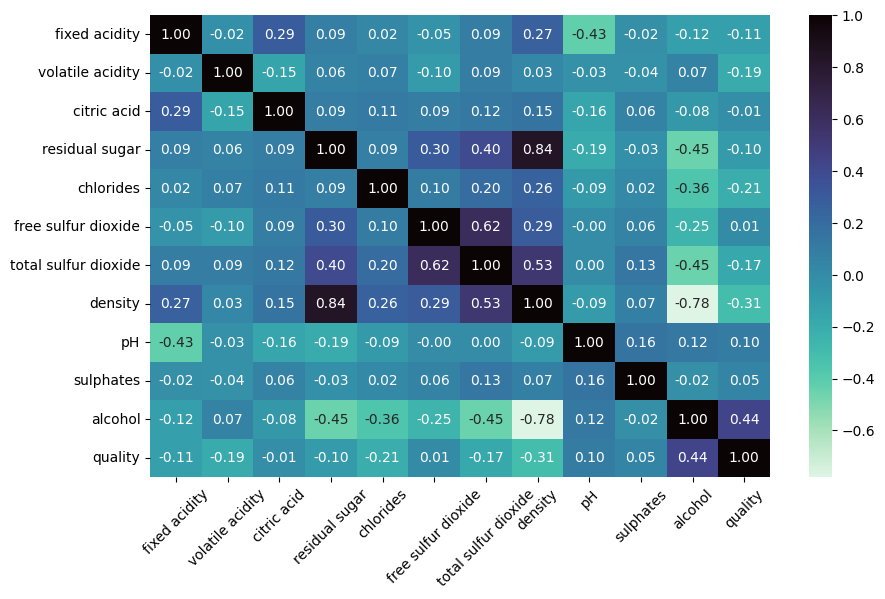

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(white_corr, annot=True, cmap='mako_r', fmt='.2f')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
#plt.title('Correlação entre as variáveis do dataset de vinho branco')
plt.show()

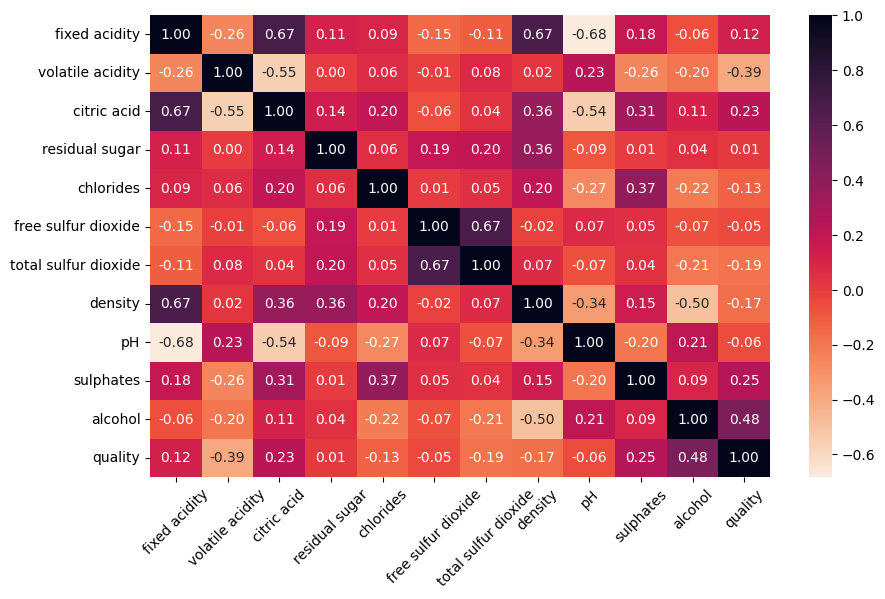

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(red_corr, annot=True, cmap='rocket_r', fmt='.2f')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
#plt.title('Correlação entre as variáveis do dataset de vinho tinto')
plt.savefig('./corr.png', transparent=True, dpi=300)
plt.show()

In [ ]:
white.drop('wine type', axis=1).groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000
4,7.129448,0.381227,0.304233,4.628221,0.050098,23.358896,125.279141,0.994277,3.182883,0.476135,10.152454
5,6.933974,0.302011,0.337653,7.334969,0.051546,36.432052,150.904598,0.995263,3.168833,0.482203,9.808840
6,6.837671,0.260564,0.338025,6.441606,0.045217,35.650591,137.047316,0.993961,3.188599,0.491106,10.575372
7,6.734716,0.262767,0.325625,5.186477,0.038191,34.125568,125.114773,0.992452,3.213898,0.503102,11.367936
8,6.657143,0.277400,0.326514,5.671429,0.038314,36.720000,126.165714,0.992236,3.218686,0.486229,11.636000
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


In [ ]:
red.drop('wine type', axis=1).groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


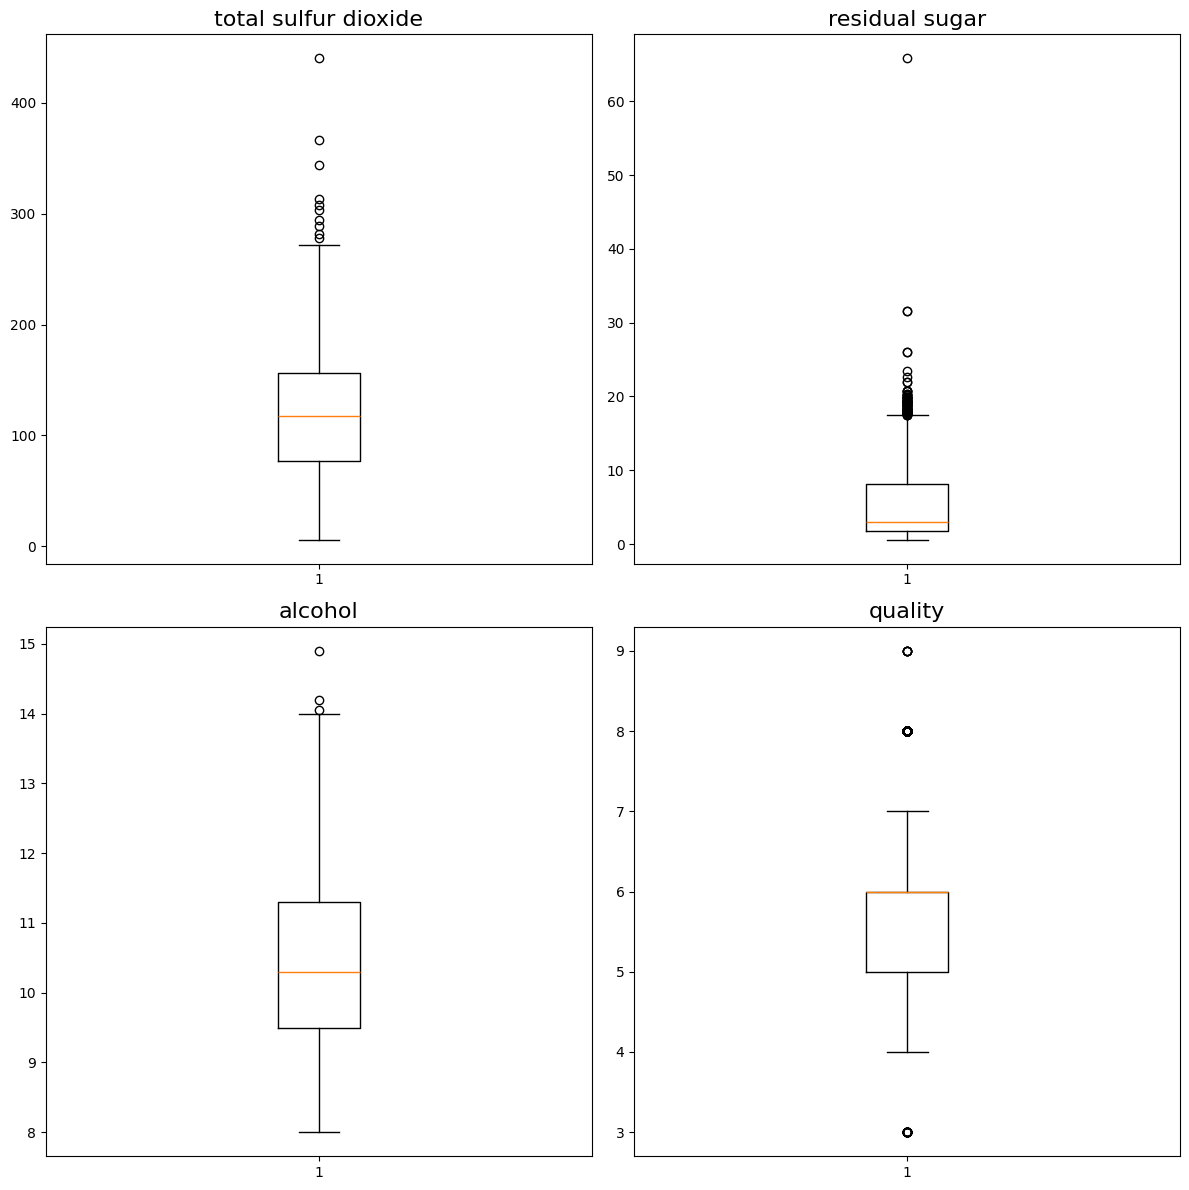

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()

columns = ['total sulfur dioxide', 'residual sugar', 'alcohol', 'quality']

for i, column in enumerate(columns):
    axes[i].boxplot(df[column])
    axes[i].set_title(column, fontsize=16)

plt.tight_layout()
plt.show()
fig.savefig('boxplot_unconditional.png', transparent=True, dpi=300)

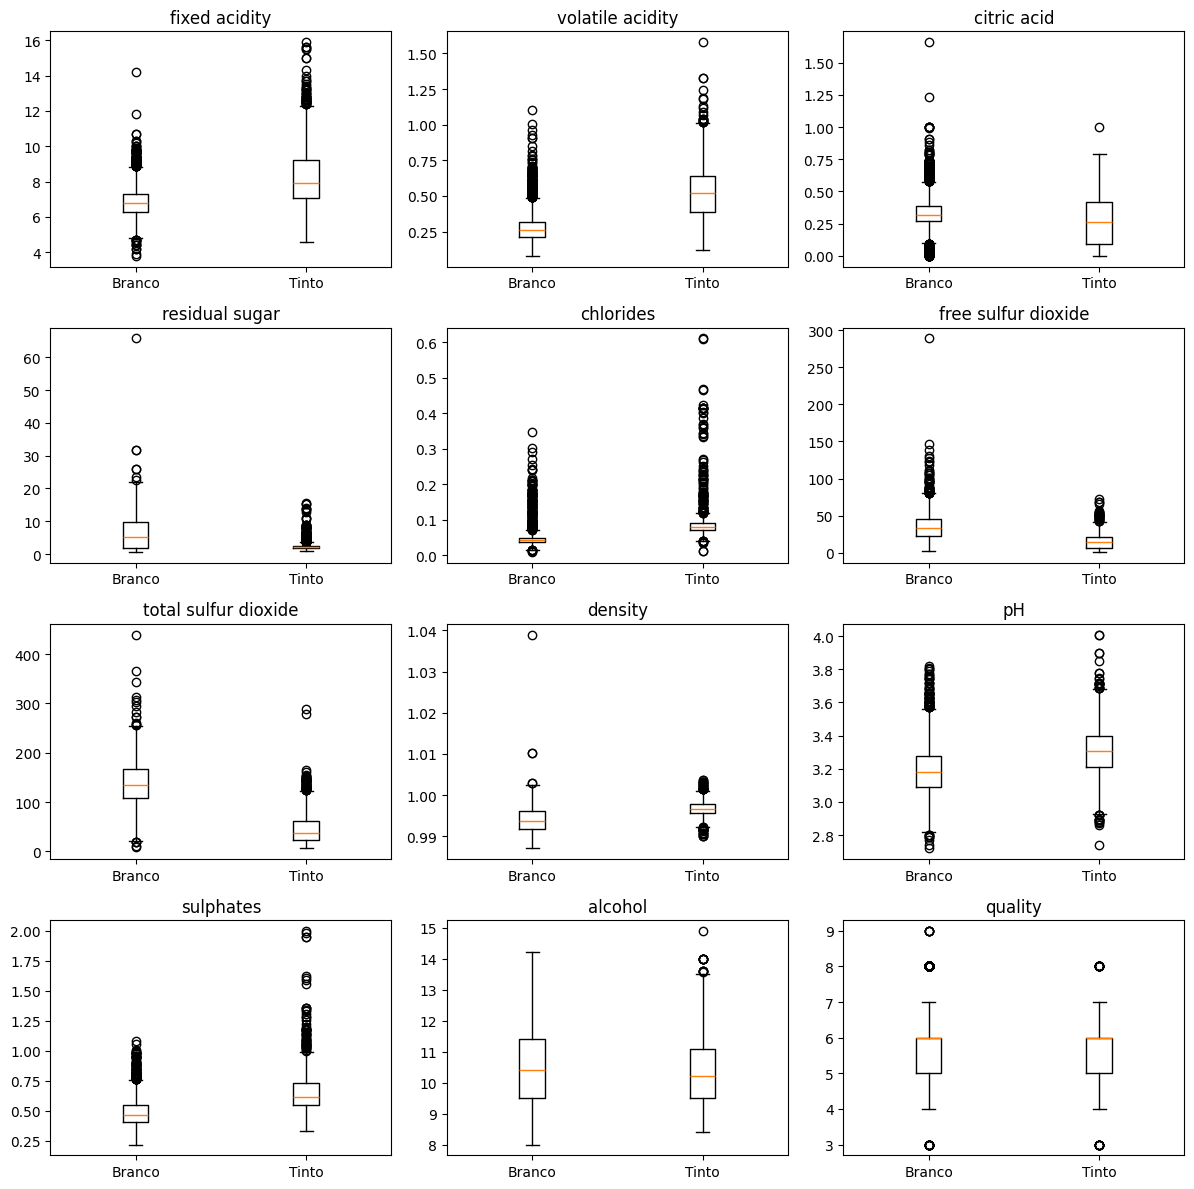

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(12, 12))
axes = axes.flatten()

columns = white.columns[:-1]

for i, column in enumerate(columns):
    axes[i].boxplot([white[column], red[column]], labels=['Branco', 'Tinto'])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

In [ ]:
# Comparação das Médias entre Vinhos de baixa, média e alta qualidade

# Definindo alta e baixa qualidade
alta_qualidade = df[df['quality'] >= 7]
baixa_qualidade = df[df['quality'] <= 4]
media_qualidade = df[(df['quality'] > 4) & (df['quality'] < 7)]

# Calculando as médias para cada grupo
variaveis = ['alcohol', 'sulphates', 'chlorides']
media_alta_qualidade = alta_qualidade[variaveis].mean()
media_baixa_qualidade = baixa_qualidade[variaveis].mean()
media_media_qualidade = media_qualidade[variaveis].mean()

print("Médias para vinhos de baixa qualidade:")
print(media_baixa_qualidade)

print("\nMédias para vinhos de média qualidade:")
print(media_media_qualidade)

print("\nMédias para vinhos de alta qualidade:")
print(media_alta_qualidade)

Médias para vinhos de baixa qualidade:
alcohol      10.184350
sulphates     0.505732
chlorides     0.062126
dtype: float64

Médias para vinhos de média qualidade:
alcohol      10.265275
sulphates     0.529908
chlorides     0.058674
dtype: float64

Médias para vinhos de alta qualidade:
alcohol      11.433359
sulphates     0.541488
chlorides     0.044576
dtype: float64


In [ ]:
# Calculando os intervalos interquartis (IQR) para alta e baixa qualidade
variaveis = ['pH', 'chlorides', 'volatile acidity']
iqr_alta_qualidade = alta_qualidade[variaveis].quantile([0.25, 0.75])
iqr_baixa_qualidade = baixa_qualidade[variaveis].quantile([0.25, 0.75])
iqr_media_qualidade = media_qualidade[variaveis].quantile([0.25, 0.75])

print("\nIntervalo Interquartil para vinhos de baixa qualidade:")
print(iqr_baixa_qualidade)

print("\nIntervalo Interquartil para vinhos de média qualidade:")
print(iqr_media_qualidade)

print("\nIntervalo Interquartil para vinhos de alta qualidade:")
print(iqr_alta_qualidade)


Intervalo Interquartil para vinhos de baixa qualidade:
        pH  chlorides  volatile acidity
0.25  3.09    0.04025              0.28
0.75  3.36    0.06800              0.61

Intervalo Interquartil para vinhos de média qualidade:
        pH  chlorides  volatile acidity
0.25  3.11       0.04              0.23
0.75  3.32       0.07              0.42

Intervalo Interquartil para vinhos de alta qualidade:
        pH  chlorides  volatile acidity
0.25  3.12      0.033              0.20
0.75  3.34      0.051              0.34


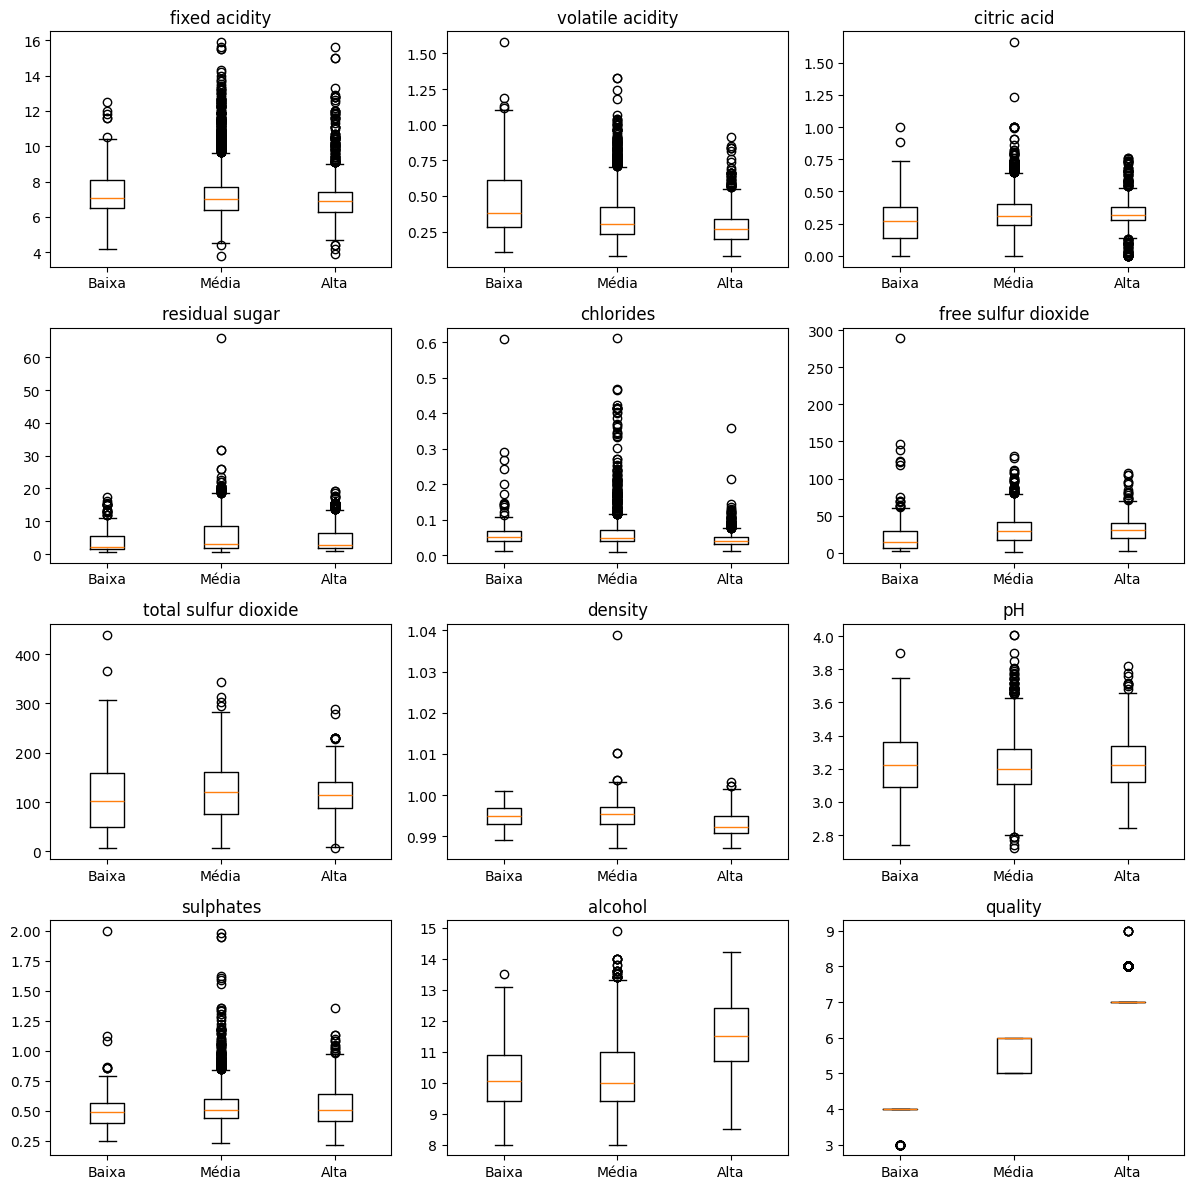

In [ ]:
# Boxplot por grupo de qualidade
fig, axes = plt.subplots(4, 3, figsize=(12, 12))
axes = axes.flatten()

columns = white.columns[:-1]

for i, column in enumerate(columns):
    axes[i].boxplot([baixa_qualidade[column], media_qualidade[column], alta_qualidade[column]], labels=['Baixa', 'Média', 'Alta'])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

## Análise de Componentes Principais (PCA)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(df.drop('wine type', axis=1))

pca = PCA(n_components=None)
transformed = pca.fit_transform(dataset_scaled)

white_indices = np.where(df['wine type'] == 'white')[0]
red_indices = np.where(df['wine type'] == 'red')[0]
red_transformed = transformed[red_indices]
white_transformed = transformed[white_indices]

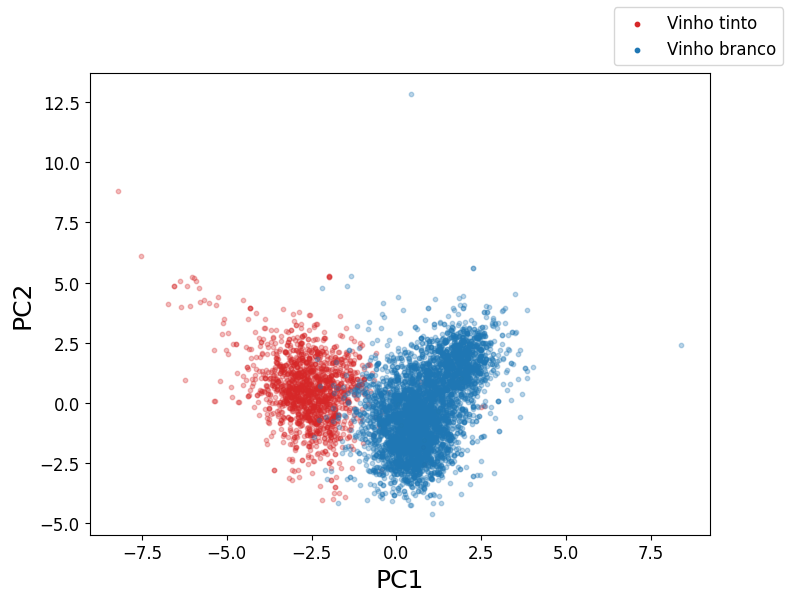

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

FONT_SIZE = 18
LABEL_SIZE = 12

ax.scatter(red_transformed[:, 0], red_transformed[:, 1], alpha=0.3, c='tab:red', s=10, label='Vinho tinto')
ax.scatter(white_transformed[:, 0], white_transformed[:, 1], alpha=0.3, c='tab:blue', s=10, label='Vinho branco')

ax.set_xlabel('PC1', fontsize=FONT_SIZE)
ax.set_ylabel('PC2', fontsize=FONT_SIZE)

ax.tick_params(axis='y', labelsize=LABEL_SIZE)
ax.tick_params(axis='x', labelsize=LABEL_SIZE)
#plt.title('PCA dos datasets de vinho branco e tinto')
leg = fig.legend(fontsize=LABEL_SIZE)

for lh in leg.legend_handles:
  lh.set_alpha(1)

fig.show()
fig.savefig('./pca_sampled.png', transparent=True, dpi=300)

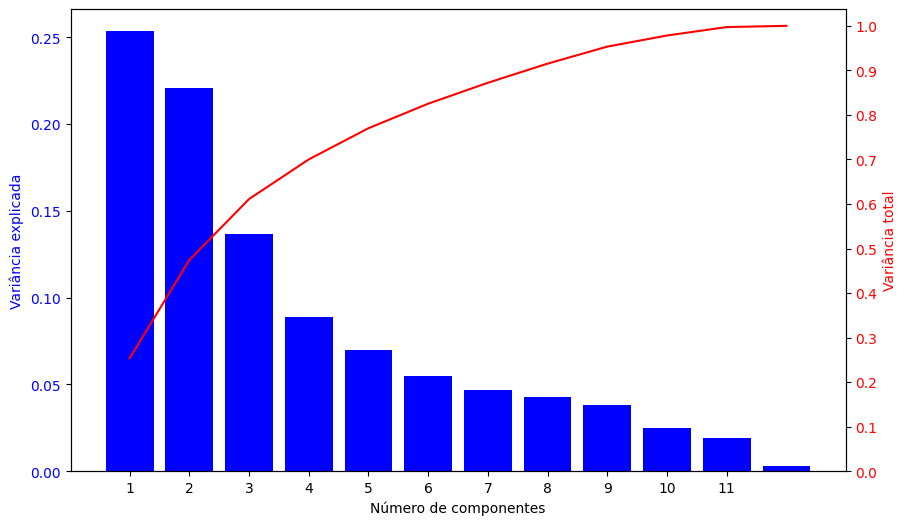

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(np.arange(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, color='b')
ax.set_xlabel('Número de componentes')
ax.set_ylabel('Variância explicada', color='blue')
ax.tick_params(axis='y', labelcolor='blue')
ax.set_xticks(np.arange(len(pca.explained_variance_ratio_)))


ax_twin = ax.twinx()
ax_twin.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), c='r')
ax_twin.set_ylabel('Variância total', color='red')
ax_twin.tick_params(axis='y', labelcolor='red')
ax_twin.set_yticks(np.linspace(0, 1, 11))

plt.show()

In [ ]:
transformed.T.shape

(12, 6497)

In [ ]:
np.corrcoef(transformed.T).shape

(12, 12)

## White signal

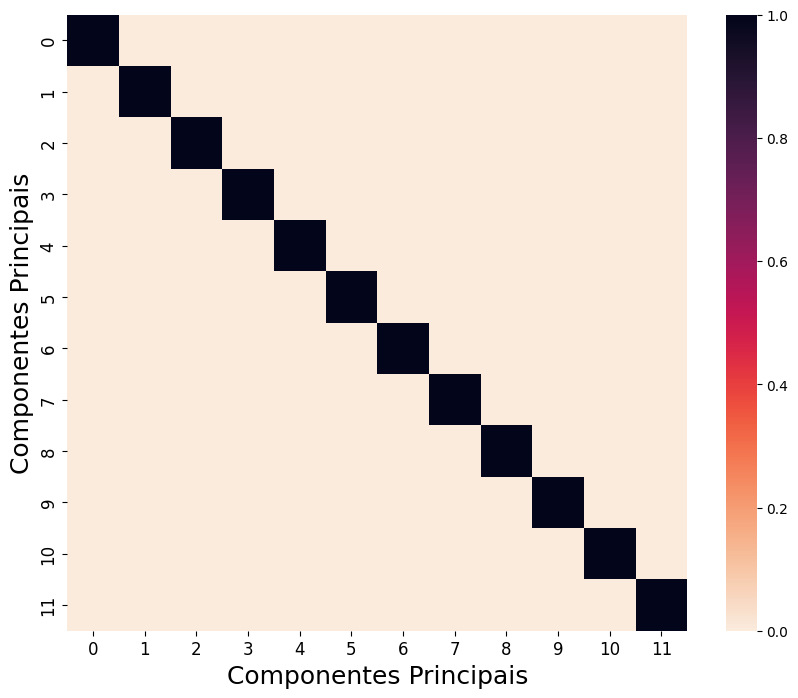

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

FONT_SIZE = 18
LABEL_SIZE = 12

pp = sns.heatmap(np.corrcoef(transformed.T), cmap='rocket_r', ax=ax)
#ax.set_xticklabels(nomes_componentes, rotation=45)
#ax.set_yticklabels(nomes_componentes, rotation=360)
ax.tick_params(axis='y', labelsize=LABEL_SIZE)
ax.tick_params(axis='x', labelsize=LABEL_SIZE)
ax.set_xlabel('Componentes Principais', fontsize=FONT_SIZE)
ax.set_ylabel('Componentes Principais', fontsize=FONT_SIZE)
#ax.set_xticks(rotation=90)

fig.savefig('white_signal.png',transparent=True, dpi=300)

## Scree plot

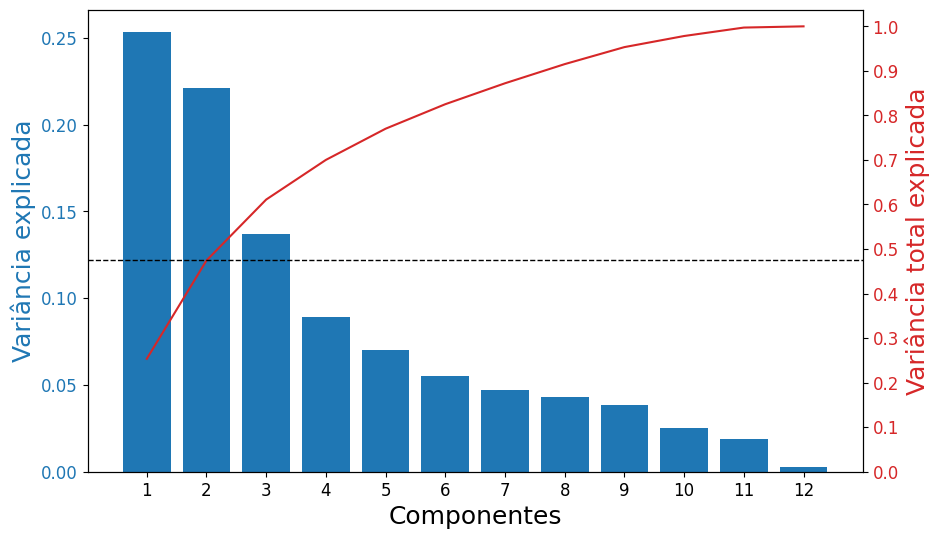

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

FONT_SIZE = 18
LABEL_SIZE = 12

ax1_color = 'tab:blue'
ax.bar(np.arange(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, label='Variância percentual explicada pela iésima componente', color=ax1_color)
#ax.set_yticks(np.linspace(0,1,11))
ax.set_xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1), )
ax.tick_params(axis='y', labelcolor=ax1_color, labelsize=LABEL_SIZE)
ax.tick_params(axis='x', labelsize=LABEL_SIZE)
ax.set_xlabel('Componentes', fontsize=FONT_SIZE)

ax.set_ylabel('Variância explicada', c=ax1_color, fontsize=FONT_SIZE)

ax2 = ax.twinx()
ax2_color = 'tab:red'
ax2.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), label='Variância percentual explicada pelas primeiras i componentes', c=ax2_color)
ax2.tick_params(axis='y', labelcolor=ax2_color, labelsize=LABEL_SIZE)
ax2.set_yticks(np.linspace(0,1,11))

ax2.set_ylabel('Variância total explicada', c=ax2_color, fontsize=FONT_SIZE)


x,y = 2, np.cumsum(pca.explained_variance_ratio_)[1]
ax2.axhline(y, color="black", linestyle="--", linewidth=1)
#ax2.axvline(x, color="black", linestyle="--", linewidth=1)

fig.savefig('scree_plot.png', transparent=True, dpi=300)

## PCA (Impementação)

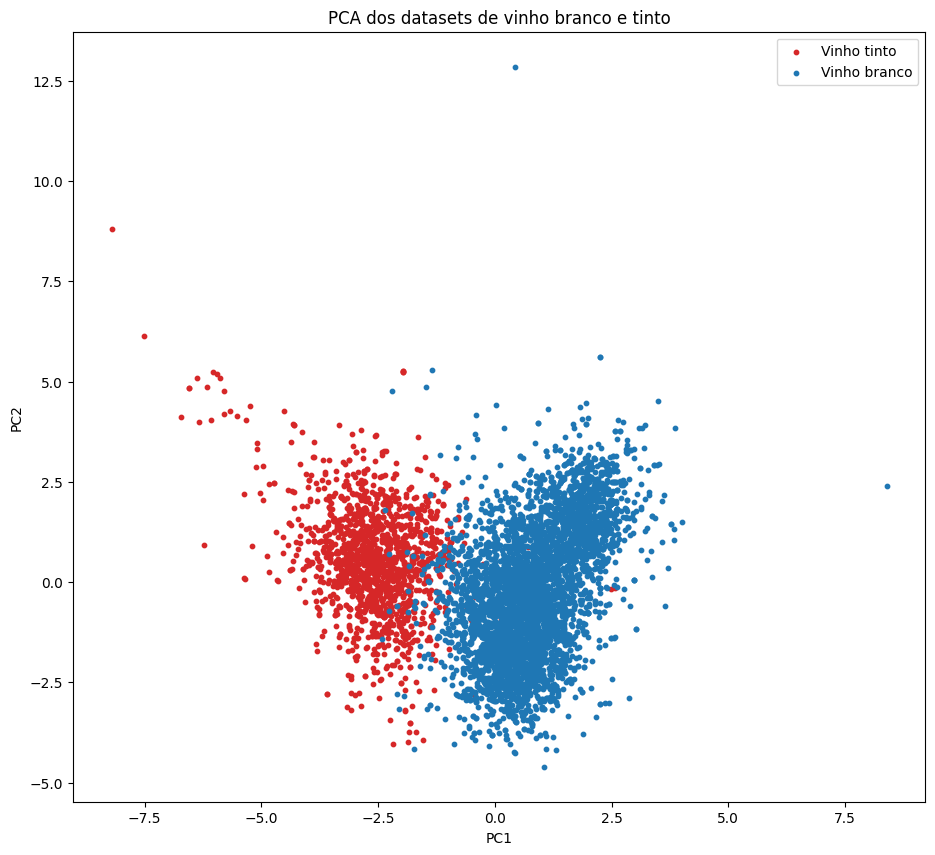

In [ ]:
Cx = np.cov(dataset_scaled.T) # Estima a matriz de covariancia dos dados simulados
U, L, V = np.linalg.svd(Cx)
VEi = L / np.sum(L) # Variancia explicada pelo i-esimo autovalor
VEq = np.cumsum(L) / np.sum(L) # Variancia explicada pelos q primeiros autovalores
Q = V[:2, :]
Z = Q @ dataset_scaled.T

white_indices = np.where(df['wine type'] == 'white')[0]
red_indices = np.where(df['wine type'] == 'red')[0]

red_wines_pca = Z[:, red_indices]
white_wines_pca = Z[:, white_indices]

plt.scatter(red_wines_pca[0, :], red_wines_pca[1, :], c='tab:red', s=10, label='Vinho tinto')
plt.scatter(white_wines_pca[0, :], white_wines_pca[1, :], c='tab:blue', s=10, label='Vinho branco')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA dos datasets de vinho branco e tinto')
plt.legend()
plt.show()

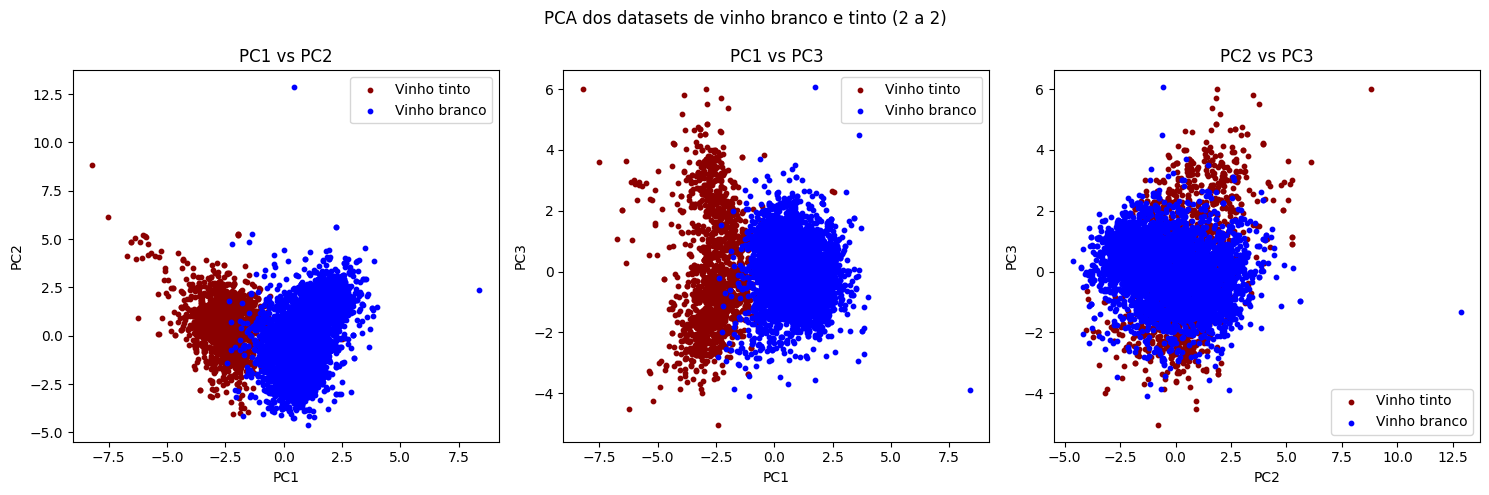

In [ ]:
from itertools import combinations
# Calcula a matriz de covariância
Cx = np.cov(dataset_scaled.T)
U, L, V = np.linalg.svd(Cx)
VEi = L / np.sum(L)  # Variância explicada pelo i-ésimo autovalor
VEq = np.cumsum(L) / np.sum(L)  # Variância explicada cumulativa
Q = V[:3, :]  # Mantém os 3 primeiros autovetores
Z = Q @ dataset_scaled.T  # Projeta os dados no espaço PCA

white_indices = np.where(df['wine type'] == 'white')[0]
red_indices = np.where(df['wine type'] == 'red')[0]

red_wines_pca = Z[:, red_indices]
white_wines_pca = Z[:, white_indices]

pc_labels = ['PC1', 'PC2', 'PC3']
combs = list(combinations(range(3), 2))

fig, axes = plt.subplots(1, len(combs), figsize=(15, 5), tight_layout=True)

for ax, (i, j) in zip(axes, combs):
    ax.scatter(
        red_wines_pca[i, :], red_wines_pca[j, :], c='darkred', s=10, label='Vinho tinto'
    )
    ax.scatter(
        white_wines_pca[i, :], white_wines_pca[j, :], c='blue', s=10, label='Vinho branco'
    )
    ax.set_xlabel(pc_labels[i])
    ax.set_ylabel(pc_labels[j])
    ax.set_title(f'{pc_labels[i]} vs {pc_labels[j]}')
    ax.legend()

plt.suptitle('PCA dos datasets de vinho branco e tinto (2 a 2)')
plt.show()

In [ ]:
quality3 = np.where(df['quality'] == 3)[0]
quality4 = np.where(df['quality'] == 4)[0]
quality5 = np.where(df['quality'] == 5)[0]
quality6 = np.where(df['quality'] == 6)[0]
quality7 = np.where(df['quality'] == 7)[0]
quality8 = np.where(df['quality'] == 8)[0]
quality9 = np.where(df['quality'] == 9)[0]

qualidade_baixa = np.where(df['quality'] == 3)[0]
qualidade_media = np.where((df['quality'] == 4) | (df['quality'] == 5) | (df['quality'] == 6))[0]
qualidade_alta = np.where((df['quality'] == 7) | (df['quality'] == 8) | (df['quality'] == 9))[0]

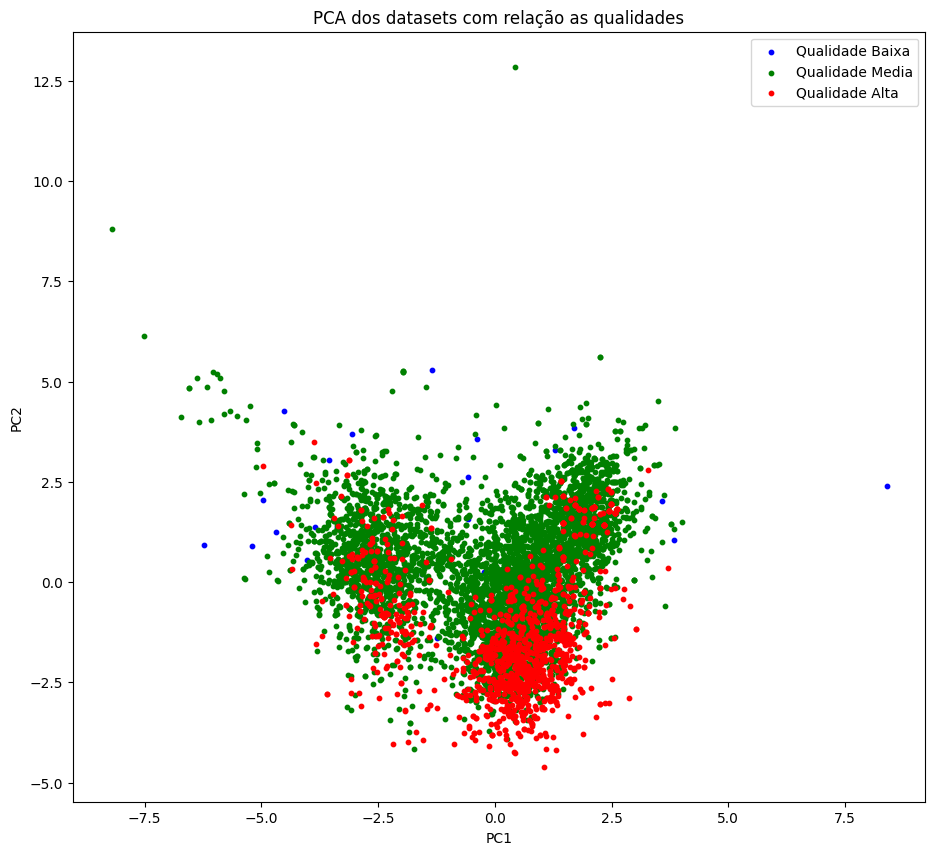

In [ ]:
Cx = np.cov(dataset_scaled.T) # Estima a matriz de covariancia dos dados simulados
U, L, V = np.linalg.svd(Cx)
VEi = L / np.sum(L) # Variancia explicada pelo i-esimo autovalor
VEq = np.cumsum(L) / np.sum(L) # Variancia explicada pelos q primeiros autovalores
Q = V[:3, :]
Z = Q @ dataset_scaled.T



quality_3_pca = Z[:, quality3]
quality_4_pca = Z[:, quality4]
quality_5_pca = Z[:, quality5]
quality_6_pca = Z[:, quality6]
quality_7_pca = Z[:, quality7]
quality_8_pca = Z[:, quality8]
quality_9_pca = Z[:, quality9]

qualidade_baixa_pca = Z[:, qualidade_baixa]
qualidade_media_pca = Z[:, qualidade_media]
qualidade_alta_pca = Z[:, qualidade_alta]
"""
plt.scatter(quality_3_pca[0, :], quality_3_pca[1, :], c='b', s=10, label='Qualidade 3')
plt.scatter(quality_4_pca[0, :], quality_4_pca[1, :], c='g', s=10, label='Qualidade 4')
plt.scatter(quality_5_pca[0, :], quality_5_pca[1, :], c='r', s=10, label='Qualidade 5')
plt.scatter(quality_6_pca[0, :], quality_6_pca[1, :], c='c', s=10, label='Qualidade 6')
plt.scatter(quality_7_pca[0, :], quality_7_pca[1, :], c='m', s=10, label='Qualidade 7')
plt.scatter(quality_8_pca[0, :], quality_8_pca[1, :], c='y', s=10, label='Qualidade 8')
plt.scatter(quality_9_pca[0, :], quality_9_pca[1, :], c='k', s=10, label='Qualidade 9')
"""

plt.scatter(qualidade_baixa_pca[0, :], qualidade_baixa_pca[1, :], c='b', s=10, label='Qualidade Baixa')
plt.scatter(qualidade_media_pca[0, :], qualidade_media_pca[1, :], c='g', s=10, label='Qualidade Media')
plt.scatter(qualidade_alta_pca[0, :], qualidade_alta_pca[1, :], c='r', s=10, label='Qualidade Alta')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA dos datasets com relação as qualidades')
plt.legend()
plt.show()

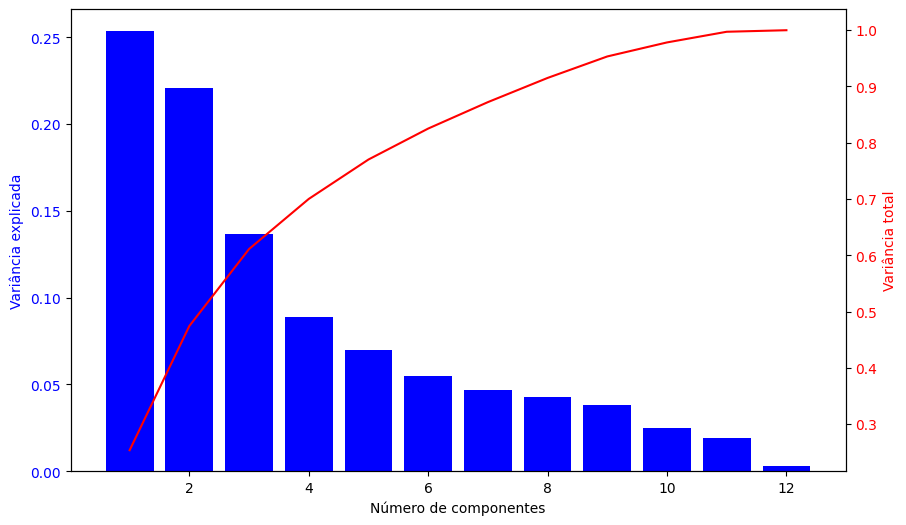

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(np.arange(1, len(VEi) + 1), VEi, color='b')
ax.set_xlabel('Número de componentes')
ax.set_ylabel('Variância explicada', color='blue')
ax.tick_params(axis='y', labelcolor='blue')


ax_twin = ax.twinx()
ax_twin.plot(np.arange(1, len(VEq) + 1), VEq, c='r')
ax_twin.set_ylabel('Variância total', color='red')
ax_twin.tick_params(axis='y', labelcolor='red')

plt.show()

## Skewness (Assimetria)

In [ ]:
skewness = df.drop('wine type', axis=1).skew()
skewness

,0
fixed acidity,1.723290
volatile acidity,1.495097
citric acid,0.471731
residual sugar,1.435404
chlorides,5.399828
free sulfur dioxide,1.220066
total sulfur dioxide,-0.001177
density,0.503602
pH,0.386839
sulphates,1.797270
